### 增益法
编写Python代码，对涉及到13个特征，使用随机森林的方法进行重要性评价

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
              'Alcalinity of ash', 'Magnesium', 'Total phenols', 
              'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
              'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X, y = df.drop(columns='Class label'),df['Class label']
forest = RandomForestClassifier(n_estimators=10000, random_state=0)
forest.fit(X, y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for e in range(X.shape[1]):
    print("%2d) %-*s %f" % (e + 1, 30, X.columns[indices[e]], importances[indices[e]]))

 1) Proline                        0.172933
 2) Color intensity                0.159572
 3) Flavanoids                     0.158639
 4) Alcohol                        0.122553
 5) OD280/OD315 of diluted wines   0.117285
 6) Hue                            0.082196
 7) Total phenols                  0.052964
 8) Magnesium                      0.030679
 9) Malic acid                     0.030567
10) Alcalinity of ash              0.026736
11) Proanthocyanins                0.021301
12) Ash                            0.013659
13) Nonflavanoid phenols           0.010917


可将特征重要性得分通过条形图进行展现

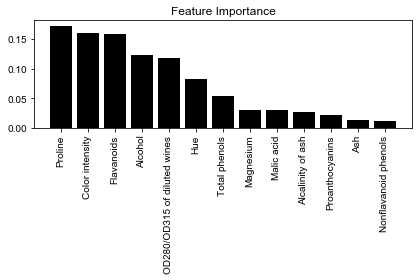

In [3]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial Unicode MS'
plt.title('Feature Importance')
plt.bar(range(X.shape[1]), importances[indices], color='black', align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

### 置换法
现基于wine.data数据集，通过编写Python代码，说明置换法的原理和使用方法

In [4]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import random

def eval_func(xtrain,ytrain,ytest,xtest):
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(xtrain, ytrain)
    C2= confusion_matrix(ytest, clf.predict(xtest))
    return np.sum(np.diag(C2))/xtest.shape[0]

out = []
for i in range(10000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=i)
    org_ratio = eval_func(X_train,y_train,y_test,X_test)
    eval_list = []
    for col in X_train.columns:
        new_train = X_train.copy()
        new_train[col] = random.choice(range(new_train.shape[0]))
        decrease = org_ratio - eval_func(new_train,y_train,y_test,X_test)
        eval_list.append(decrease if decrease > 0 else 0)
    out.append(eval_list)

importances = pd.DataFrame(np.array(out)).apply(lambda x:np.mean(x),axis=0).values
indices = np.argsort(importances)[::-1]
for e in range(X.shape[1]):
    print("%2d) %-*s %f" % (e + 1, 30, X_train.columns[indices[e]], importances[indices[e]]))

 1) Color intensity                0.024976
 2) Flavanoids                     0.021737
 3) Proline                        0.014465
 4) OD280/OD315 of diluted wines   0.009800
 5) Ash                            0.009589
 6) Alcohol                        0.009480
 7) Hue                            0.009200
 8) Total phenols                  0.009128
 9) Malic acid                     0.008869
10) Nonflavanoid phenols           0.008781
11) Alcalinity of ash              0.008774
12) Magnesium                      0.008598
13) Proanthocyanins                0.008398


将特征重要性得分通过条形图进行展现

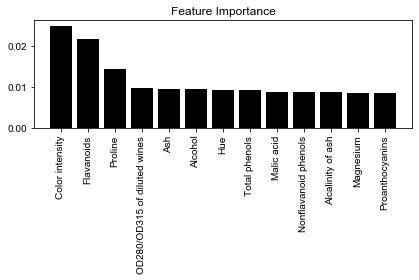

In [5]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], color='black', align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()